In [168]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [169]:
df = pd.read_csv("C:\\Users\\pcoda\\OneDrive\\Dataset{Manually}\\Kaggle\\Titanic\\train.csv", usecols=['Age', 'Fare', 'Survived'])

In [170]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [171]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [172]:
df = df.dropna() # It removes null values

In [173]:
df.shape

(714, 3)

In [174]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [175]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2) 

In [176]:
x_train

,Age,Fare
217,42.0,27.0000
1,38.0,71.2833
879,56.0,83.1583
94,59.0,7.2500
430,28.0,26.5500
...,...,...
770,24.0,9.5000
21,34.0,13.0000
554,22.0,7.7750
488,30.0,8.0500


In [177]:
y_train

217    0
1      1
879    1
94     0
430    1
      ..
770    0
21     1
554    1
488    0
112    0
Name: Survived, Length: 571, dtype: int64

## Equal width binning

- You can provide n_bins according to your business logic
- ***Spread of the data remain Same for equal width binning.***

In [178]:
clf1 = DecisionTreeClassifier()

clf1.fit(x_train, y_train)

DecisionTreeClassifier()

In [179]:
y_pred = clf1.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [180]:
accuracy_score(y_test,y_pred)*100

59.44055944055944

In [181]:
# now we apply binning

# Equal width

kbde_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform') # Uniform means equal width
kbde_age

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [182]:
kbde_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform') # Uniform means equal width
kbde_fare

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [183]:
trf = ColumnTransformer([
    ('Age_desc', kbde_age, ['Age']),
    ('Fare_desc', kbde_fare, ['Fare'])
])
trf

ColumnTransformer(transformers=[('Age_desc',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10,
                                                  strategy='uniform'),
                                 ['Age']),
                                ('Fare_desc',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10,
                                                  strategy='uniform'),
                                 ['Fare'])])

In [184]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [185]:
x_train_transformed

array([[5., 0.],
       [5., 1.],
       [7., 1.],
       ...,
       [2., 0.],
       [3., 0.],
       [2., 0.]])

In [186]:
trf.named_transformers_['Age_desc'].bin_edges_ # all intervals have equal width

array([array([ 0.67 ,  8.003, 15.336, 22.669, 30.002, 37.335, 44.668, 52.001,
              59.334, 66.667, 74.   ])                                       ],
      dtype=object)

In [187]:
trf.named_transformers_['Fare_desc'].bin_edges_ # all intervals have equal width

array([array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
              307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ])          ],
      dtype=object)

In [188]:
clf = DecisionTreeClassifier()
clf.fit(x_train_transformed,y_train)
y_pred2 = clf.predict(x_test_transformed)

In [189]:
np.mean(accuracy_score(y_test, y_pred2))*100 # Increase the accuracy score after applying binning

np.float64(65.73426573426573)

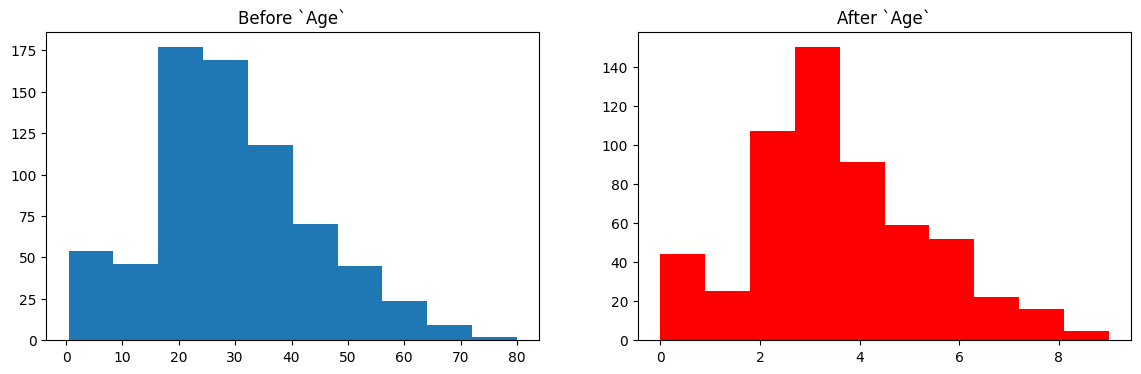

In [190]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(X['Age'])
plt.title("Before `Age`")

plt.subplot(122)
plt.hist(x_train_transformed[:,0],color='red')
plt.title("After `Age`")

plt.show()

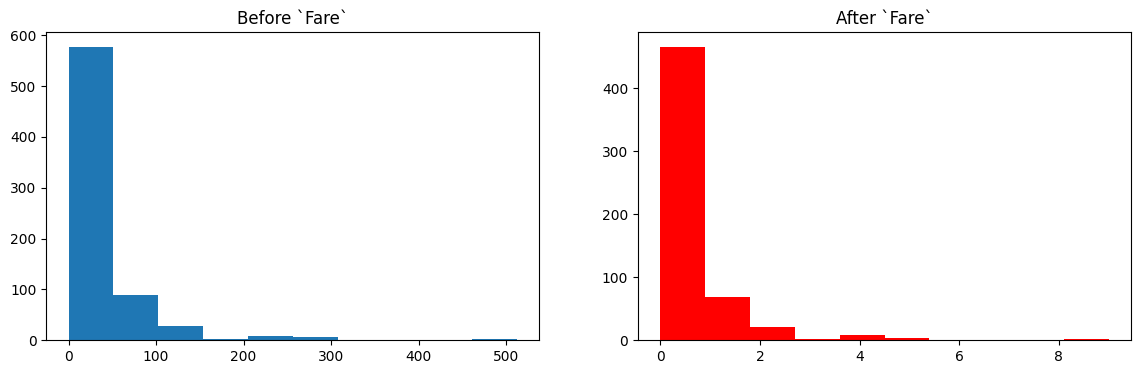

In [191]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(X['Fare'])
plt.title("Before `Fare`")

plt.subplot(122)
plt.hist(x_train_transformed[:,1],color='red')
plt.title("After `Fare`")

plt.show()

# Equal quantile binning

- You can provide n_bins according to your business logic
- ***It make uniform Spread of the data.***

In [192]:
# same code as above only difference is you change the strategy from uniform to quantile 

In [193]:
kbdq_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile') # Uniform means equal width
kbdq_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile') # Uniform means equal width

In [194]:
trf2 = ColumnTransformer([
    ("Age_desc_q", kbdq_age, ['Age']),
    ("Fare_desc_q", kbdq_fare, ['Fare'])
])

In [195]:
trf2

ColumnTransformer(transformers=[('Age_desc_q',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 ['Age']),
                                ('Fare_desc_q',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 ['Fare'])])

In [196]:
x_train_transformed_q = trf2.fit_transform(x_train)
x_test_transformed_q = trf2.transform(x_test)

In [197]:
x_train_transformed_q

array([[12., 10.],
       [11., 13.],
       [14., 13.],
       ...,
       [ 4.,  1.],
       [ 8.,  4.],
       [ 4.,  4.]])

In [198]:
trf2.named_transformers_['Age_desc_q'].bin_edges_ # Same frequency data are together not same width , First interval 15%, after 30% 

array([array([ 0.67,  6.  , 16.  , 19.  , 21.  , 24.  , 25.  , 28.  , 29.  ,
              31.  , 34.  , 38.  , 42.  , 47.  , 54.  , 74.  ])             ],
      dtype=object)

In [199]:
trf2.named_transformers_['Fare_desc_q'].bin_edges_

array([array([  0.    ,   7.2292,   7.7958,   7.925 ,   8.05  ,  10.1708,
               12.475 ,  13.5   ,  16.1   ,  24.    ,  26.2875,  30.5   ,
               46.9   ,  69.3   ,  91.0792, 512.3292])                   ],
      dtype=object)

In [200]:
clf3 = DecisionTreeClassifier()

clf3.fit(x_train_transformed_q, y_train)
y_pred3 = clf3.predict(x_test_transformed_q)

In [201]:
np.mean(accuracy_score(y_test, y_pred3))*100

np.float64(66.43356643356644)

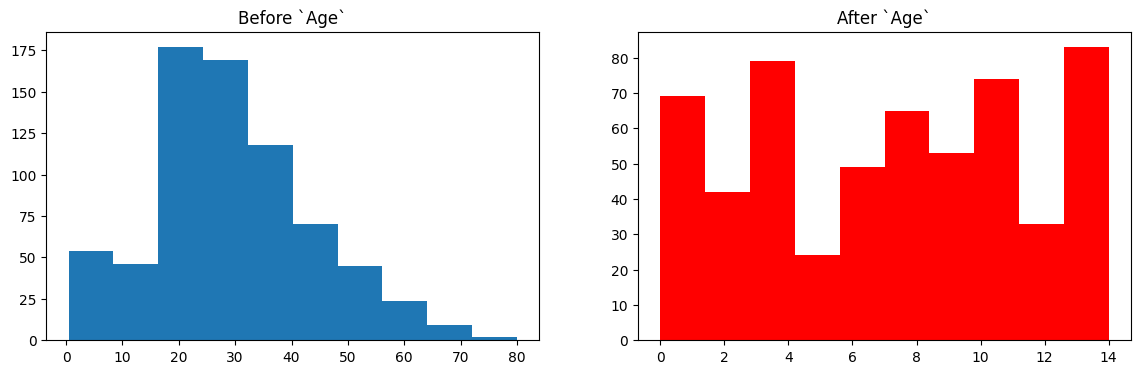

In [202]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(X['Age'])
plt.title("Before `Age`")

plt.subplot(122)
plt.hist(x_train_transformed_q[:,0],color='red')
plt.title("After `Age`")

plt.show()

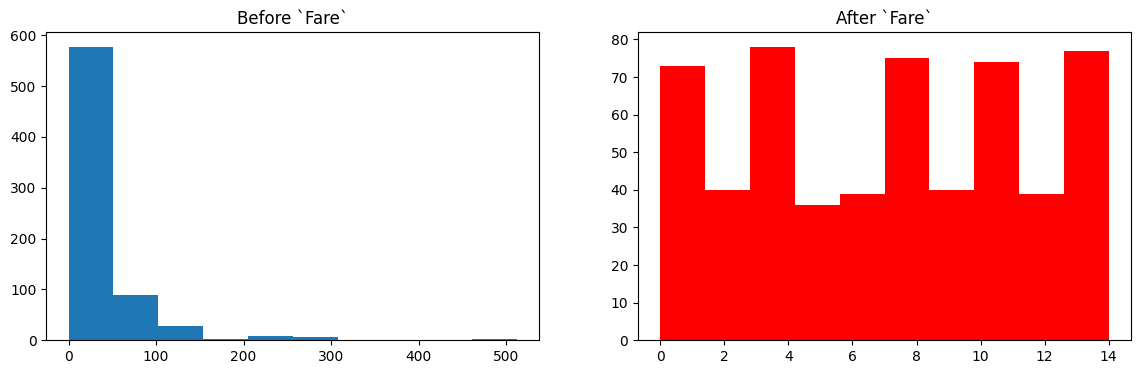

In [203]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(X['Fare'])
plt.title("Before `Fare`")

plt.subplot(122)
plt.hist(x_train_transformed_q[:,1],color='red')
plt.title("After `Fare`")

plt.show()

## KMeans


In [204]:
kbd_age = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans') # Uniform means equal width
kbd_fare = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans') # Uniform means equal width

In [205]:
trf4 = ColumnTransformer([
    ("Age_desc_kmean", kbd_age, ['Age']),
    ("Fare_desc_kmean", kbd_fare, ['Fare'])
])
trf4

ColumnTransformer(transformers=[('Age_desc_kmean',
                                 KBinsDiscretizer(encode='ordinal',
                                                  strategy='kmeans'),
                                 ['Age']),
                                ('Fare_desc_kmean',
                                 KBinsDiscretizer(encode='ordinal',
                                                  strategy='kmeans'),
                                 ['Fare'])])

In [206]:
x_train_transformed_kmean = trf4.fit_transform(x_train)
x_test_transformed_kmean = trf4.transform(x_test)

In [207]:
x_train_transformed_kmean

array([[3., 0.],
       [2., 1.],
       [4., 1.],
       ...,
       [1., 0.],
       [2., 0.],
       [1., 0.]])

In [208]:
trf4.named_transformers_['Age_desc_kmean'].bin_edges_ # makes 5 clusters becuase number of bins are 5

array([array([ 0.67      , 13.01010237, 26.39532128, 38.32797753, 52.55302326,
              74.        ])                                                   ],
      dtype=object)

In [209]:
trf4.named_transformers_['Fare_desc_kmean'].bin_edges_

array([array([  0.        ,  41.08744073,  99.55616375, 183.94327917,
              373.92952917, 512.3292    ])                           ],
      dtype=object)

In [210]:
clf4 = DecisionTreeClassifier()

clf4.fit(x_train_transformed_kmean, y_train)
y_pred4 = clf4.predict(x_test_transformed_kmean)

In [211]:
np.mean(accuracy_score(y_test, y_pred4))*100

np.float64(60.83916083916085)

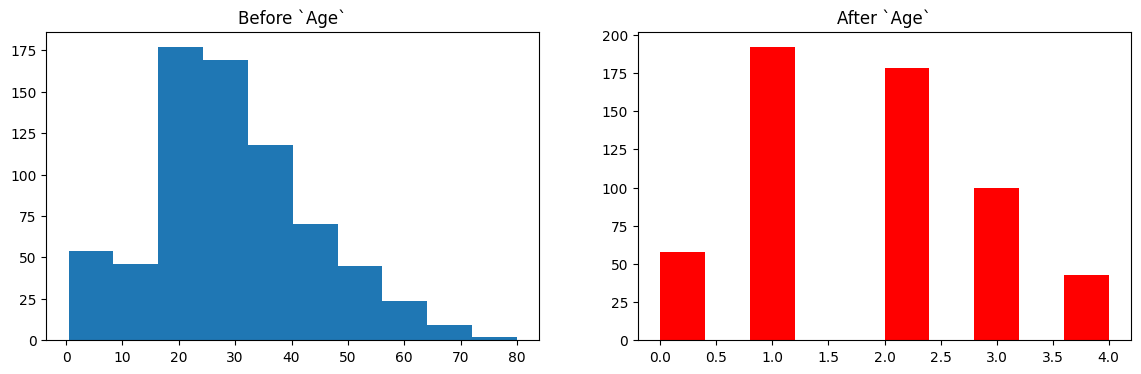

In [212]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(X['Age'])
plt.title("Before `Age`")

plt.subplot(122)
plt.hist(x_train_transformed_kmean[:,0],color='red')
plt.title("After `Age`")

plt.show()

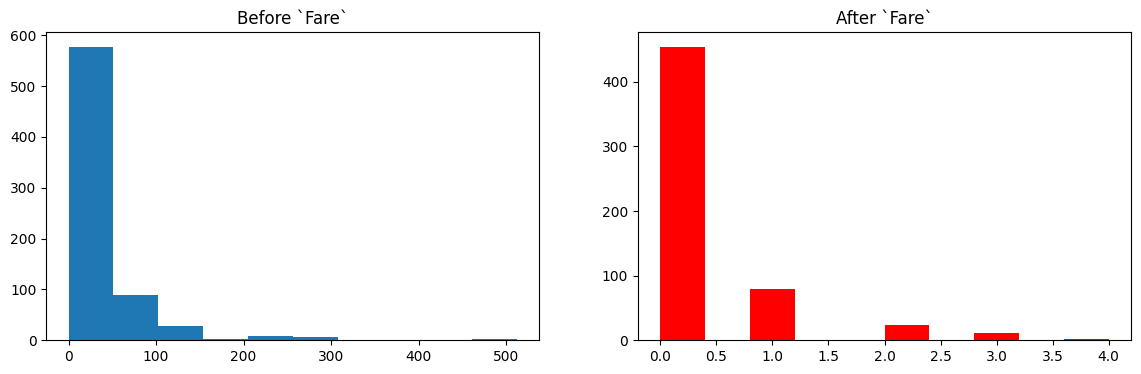

In [213]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(X['Fare'])
plt.title("Before `Fare`")

plt.subplot(122)
plt.hist(x_train_transformed_kmean[:,1],color='red')
plt.title("After `Fare`")

plt.show()

In [214]:
# If you make more clusters then grpah is dense